In [26]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the prepared data
try:
    df_merged_cleaned = pd.read_csv('../data/processed/nba_2025_player_stats_merged_cleaned.csv')
    print("Cleaned data loaded. head:")
    print(df_merged_cleaned.head())

    player_info = pd.read_csv('../data/processed/nba_2025_player_info.csv')
    print("\nPlayer info head:")
    print(player_info.head())
    print(f"\nTotal players for clustering: {len(df_merged_cleaned)}")


except FileNotFoundError:
    print("Error: Make sure 'nba_2025_player_stats_merged_cleaned.csv' and 'nba_2025_player_info.csv' are in 'data/processed/'")
    exit()

positional_clusters = {}

# It's good practice to ensure the indices align if you're going to merge later
# If you saved with index=False, the indices should naturally align after loading.
# If you had different row orders in original dataframes, merging might have reordered them.
# A safe way is to merge the player_info back with the clustered results later.

Cleaned data loaded. head:
   Rk_per100           Player   Age Team Pos_per100  G_per100  GS_per100  \
0          1    Mikal Bridges  28.0  NYK         SF      82.0       82.0   
1          2        Josh Hart  29.0  NYK         SG      77.0       77.0   
2          3  Anthony Edwards  23.0  MIN         SG      79.0       79.0   
3          4     Devin Booker  28.0  PHO         SG      75.0       75.0   
4          5     James Harden  35.0  LAC         PG      79.0       79.0   

   MP_per100    FG   FGA  ...  %FG AST 2P  %FG AST 3P  %FGA Dunks  # of Dunks  \
0     3036.0   9.7  19.3  ...       0.682       0.957       0.025        28.0   
1     2897.0   6.9  13.2  ...       0.613       0.869       0.030        21.0   
2     2871.0  12.4  27.7  ...       0.384       0.475       0.039        54.0   
3     2795.0  11.6  25.1  ...       0.431       0.716       0.013        14.0   
4     2789.0   9.4  22.9  ...       0.176       0.370       0.003         4.0   

   Coner %3PA  Corner 3P%  He

In [27]:
def find_optimal_k(data, k_range=range(2, 10)):
    wcss = []
    sillhouette_scores = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
        score = silhouette_score(data, kmeans.labels_)
        sillhouette_scores.append(score)

    # Plot results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    ax1.plot(k_range, wcss, marker='o')
    ax1.set_title('Elbow Method')
    ax1.set_xlabel('Number of Clusters (k)')
    ax1.set_ylabel('WCSS')

    ax2.plot(k_range, sillhouette_scores, marker='o')
    ax2.set_title('Sillhouette Score')
    ax2.set_xlabel('Number of Clusters (k)')
    ax2.set_ylabel('Score')
    plt.show()

    print("Review plots and select 'k'.")

# # Elbow Method to find optimal K
# wcss = [] # Within-cluster sum of squares
# k_range = range(2, 30) # Test a range of K values, typically from 2 upwards

# for k in k_range:
#     kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init='auto' or higher is good practice
#     kmeans.fit(df_scaled)
#     wcss.append(kmeans.inertia_)

# # Plot the Elbow Method graph
# plt.figure(figsize=(10, 6))
# plt.plot(k_range, wcss, marker='o', linestyle='--')
# plt.xlabel('Number of Clusters (K)')
# plt.ylabel('Within-Cluster Sum of Squares (WCSS/Inertia)')
# plt.title('Elbow Method for Optimal K')
# plt.xticks(k_range)
# plt.grid(True)
# plt.show()

# print("Look for the 'elbow' point in the graph where the decrease in WCSS slows significantly.")


--- Clustering for Position: SF ---


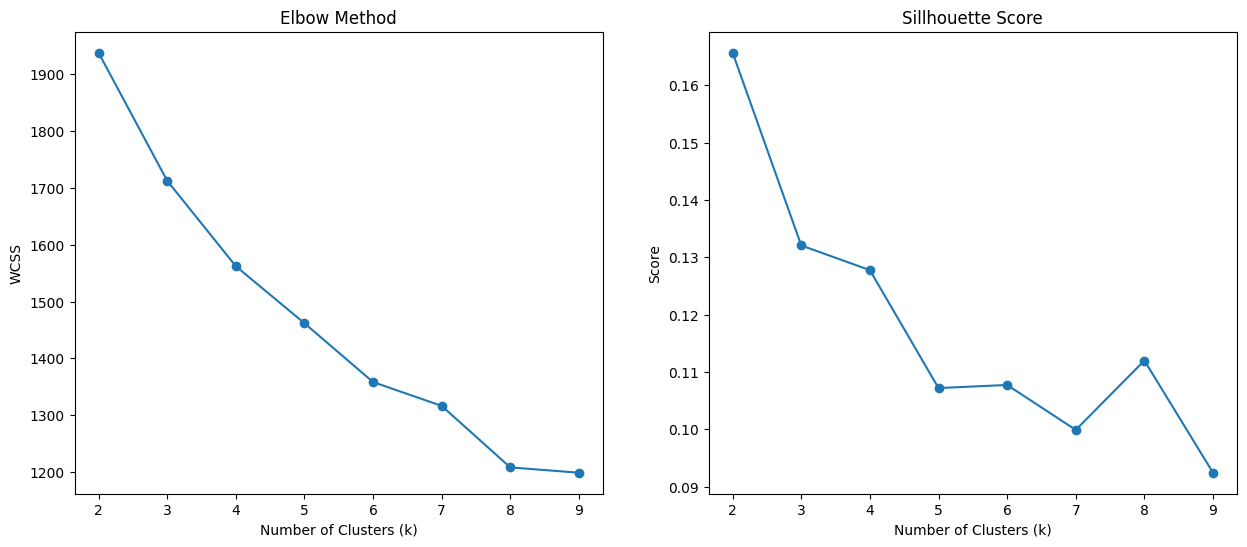

Review plots and select 'k'.
Using k=4 for position SF.

--- Clustering for Position: SG ---


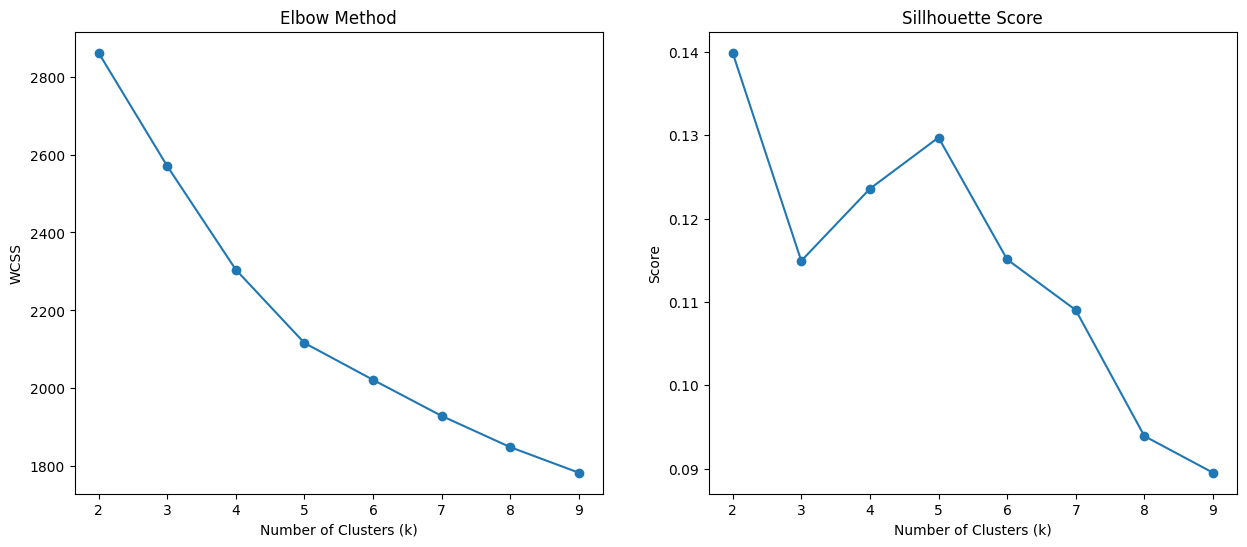

Review plots and select 'k'.
Using k=5 for position SG.

--- Clustering for Position: PG ---


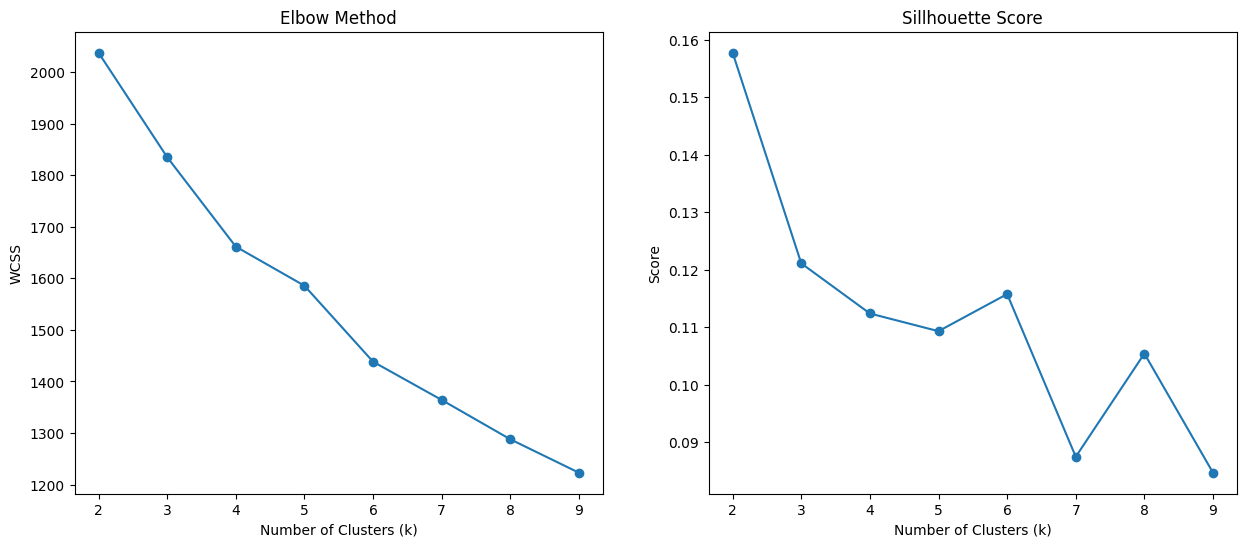

Review plots and select 'k'.
Using k=6 for position PG.

--- Clustering for Position: PF ---


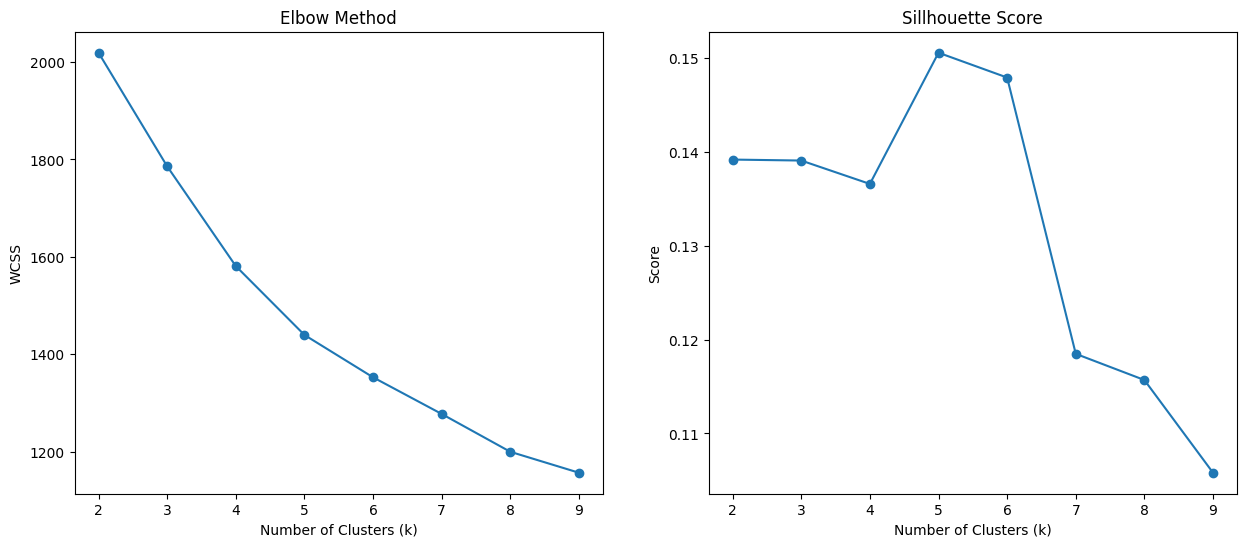

Review plots and select 'k'.
Using k=5 for position PF.

--- Clustering for Position: C ---


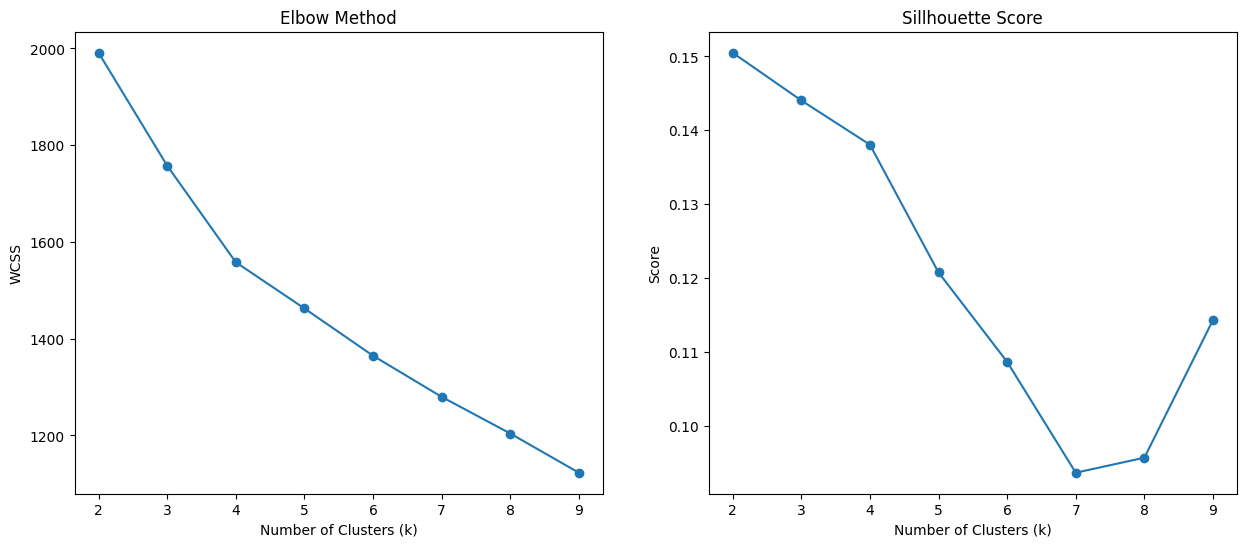

Review plots and select 'k'.
Using k=4 for position C.


In [28]:
# Define the features used for clustering
features_for_clustering = [
    'PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV', 'PF',
    'FG%', '3P%', '2P%', 'FT%', 'eFG%', 'TS%',
    '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
    'OWS', 'DWS', 'WS', 'WS/48', 'BPM', 'VORP',
    'Dist.', 'FG% 2P', 'FG% 0-3', 'FG% 3-10', 'FG% 10-16', 'FG% 16-3P',
]

# Get the list of unique positions
unique_positions = df_merged_cleaned['Pos'].unique()

for pos in unique_positions:
    print(f"\n--- Clustering for Position: {pos} ---")

    pos_data = df_merged_cleaned[df_merged_cleaned['Pos'] == pos].copy()

    if len(pos_data) < 20:
        print(f"Skipping {pos} due to insufficient players ({len(pos_data)}")
        continue

    features_data = pos_data[features_for_clustering].copy()

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(features_data)

    find_optimal_k(scaled_data)
    if pos == 'PG':
        k = 6
    elif pos == 'SG':
        k = 5
    elif pos == 'SF':
        k = 4
    elif pos == 'PF':
        k = 5
    elif pos == 'C':
        k = 4
    else: 
        k = 5

    print(f"Using k={k} for position {pos}.")

    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
    pos_data['Cluster_ID'] = kmeans_model.fit_predict(scaled_data)

    positional_clusters[pos] = {
        'data': pos_data,
        'model': kmeans_model,
        'scaler': scaler,
        'features': features_for_clustering
    }

In [29]:
for pos, results in positional_clusters.items():
    print(f"\n--- Clustering for {pos} ---")

    pos_data = results['data']

    cluster_means = pos_data.groupby('Cluster_ID')[results['features']].mean()
    print("Cluster Mean Feature Values:")
    print(cluster_means)

    def plot_radar_chart(df, title):
        pass

    for cluster_id in sorted(pos_data['Cluster_ID'].unique()):
        cluster_players = pos_data[pos_data['Cluster_ID'] == cluster_id].sort_values(by='PER', ascending=False)
        print(f"\nCluster {cluster_id} Players ({pos}):")
        print(cluster_players[['Player', 'Team', 'PER']].head(5))


--- Clustering for SF ---
Cluster Mean Feature Values:
                  PTS       AST        TRB       STL       BLK       TOV  \
Cluster_ID                                                                 
0           20.500000  4.175000  11.225000  2.312500  1.050000  2.625000   
1           20.227778  3.350000   6.755556  1.338889  0.611111  1.794444   
2           29.900000  6.540000   8.400000  1.586667  0.640000  3.373333   
3           19.070370  3.285185   7.840741  1.659259  0.896296  2.281481   

                  PF       FG%       3P%       2P%  ...        WS     WS/48  \
Cluster_ID                                          ...                       
0           4.412500  0.509750  0.324750  0.575375  ...  3.450000  0.120125   
1           3.811111  0.450111  0.396722  0.537556  ...  2.966667  0.086667   
2           2.960000  0.481800  0.356200  0.546600  ...  4.686667  0.113200   
3           3.918519  0.429111  0.314926  0.528148  ...  1.311111  0.048852   

            